## 2.Answer folling questions:

#### 1.why do we need machine learning methods instead of creating a complicated formula?

###### Ans: 因为在现实的生活中，一个实际的问题并不是固定的，也会随着时间的推移发生变化，如果使用原有的编程方法，就有针对每一个问题重新编程。而机器学习是让计算机具有学习能力，不需要进行明确编程的科学，更能够解决现实中的问题

#### 2.What's the disadvantages of the 1st Random Choosen methods in our course?

###### Ans: 第一种方法是采用随机函数随机产生系数的方法，不好的地方在于每一步计算都没有方向，很多计算是重叠和浪费的，需要大量的计算资源才能实现

#### 3.Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

###### Ans: 第二种监督学习的方法相比于第一种方法在改良方向方面有了改进，不再是随机的计算，而是根据当下一步计算的优劣决定下一步计算的方向，减少了计算量；缺点是不能找到最适合计算的条件加速计算过程减少计算次数，不能再最大程度上减少计算次数

#### 4. Why do we use Derivative / Gredient to fit a target function?

###### Ans:通过计算未知参数的导数可以知道目标函数的自变量的变化方向，从而减少计算量

#### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

###### Ans:我们的目标是找到使目标函数下降最快的方向，而最快的方向就是最陡峭的地方即最大的方向导数，这个方向导数就是梯度，下降是指为了使目标函数减少而使自变量朝着梯度相反的方向变化的意思

#### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

###### Ans:有方向性，可以选择变化幅度从而减少大量运算量

#### 7. Using the simple words to describe: What's the machine leanring.

###### Ans: 机器学习是通过编程让计算机从数据中进行学习的科学

## 1.从地铁网站中爬取地铁的线路和线路上的站点

In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
def cut(pattern,test_string):
    '''采用正则表达式提取数据'''
    return re.findall(pattern,test_string)

In [3]:
#爬取19个地铁线路的url
import requests
url_highest = 'http://bj.bendibao.com/ditie/linemap.shtml' # 地铁路线总页
response = requests.get(url_highest)
text_wait_for_finding_lines = response.text
response

<Response [200]>

In [4]:
subway_line_url_string = 'http://bj.bendibao.com/ditie/map_197.shtml'
pattern_subway_line = re.compile(r'(/ditie/map_\d+.shtml)')

In [5]:
subway_lines_test = list(set(cut(pattern_subway_line,text_wait_for_finding_lines)))

In [6]:
subway_lines_test

['/ditie/map_205.shtml',
 '/ditie/map_211.shtml',
 '/ditie/map_199.shtml',
 '/ditie/map_254.shtml',
 '/ditie/map_202.shtml',
 '/ditie/map_209.shtml',
 '/ditie/map_207.shtml',
 '/ditie/map_210.shtml',
 '/ditie/map_212.shtml',
 '/ditie/map_201.shtml',
 '/ditie/map_346.shtml',
 '/ditie/map_197.shtml',
 '/ditie/map_200.shtml',
 '/ditie/map_253.shtml',
 '/ditie/map_204.shtml',
 '/ditie/map_208.shtml',
 '/ditie/map_206.shtml',
 '/ditie/map_203.shtml',
 '/ditie/map_198.shtml']

In [7]:
subway_lines = ['http://bj.bendibao.com' + url for url in subway_lines_test] # 将url修改为requests模块函数可以访问的网址格式

In [8]:
subway_lines

['http://bj.bendibao.com/ditie/map_205.shtml',
 'http://bj.bendibao.com/ditie/map_211.shtml',
 'http://bj.bendibao.com/ditie/map_199.shtml',
 'http://bj.bendibao.com/ditie/map_254.shtml',
 'http://bj.bendibao.com/ditie/map_202.shtml',
 'http://bj.bendibao.com/ditie/map_209.shtml',
 'http://bj.bendibao.com/ditie/map_207.shtml',
 'http://bj.bendibao.com/ditie/map_210.shtml',
 'http://bj.bendibao.com/ditie/map_212.shtml',
 'http://bj.bendibao.com/ditie/map_201.shtml',
 'http://bj.bendibao.com/ditie/map_346.shtml',
 'http://bj.bendibao.com/ditie/map_197.shtml',
 'http://bj.bendibao.com/ditie/map_200.shtml',
 'http://bj.bendibao.com/ditie/map_253.shtml',
 'http://bj.bendibao.com/ditie/map_204.shtml',
 'http://bj.bendibao.com/ditie/map_208.shtml',
 'http://bj.bendibao.com/ditie/map_206.shtml',
 'http://bj.bendibao.com/ditie/map_203.shtml',
 'http://bj.bendibao.com/ditie/map_198.shtml']

In [9]:
pattern_station_untransferable = re.compile(r'<a\s+class="link"\s+href="/ditie/\w+_\w+.shtml"\s+target="_blank">(\w+)</a>') # 不可换乘的正则表达式
pattern_station_transferable = re.compile(r'<a\s+class="link"\s+href="/ditie/\w+_\w+.shtml">(\w+)</a>') # 可换乘的正则表达式

In [10]:
def spider_line_x_station(soup_a,pattern_station_transfer,pattern_station_untransfer):
    '''根据BeautifulSoup中的"a"tag标签内容筛选站点'''
    line_x = []
    
    for line in soup_a:
        station = cut(pattern_station_transfer,str(line))
        
        if len(station) == 0:
            station = cut(pattern_station_untransfer,str(line))
        
        if len(station) != 0:
            line_x.append(station[0])
            
    return line_x

In [11]:
def get_title_name(soup_title):
    return str(soup_title).split(',')[0].lstrip('<title>')[4:-3]

In [12]:
subway_lines_stations = {}
for line_url in subway_lines:
    response = requests.get(line_url)
    line_html = response.text
    
    soup = BeautifulSoup(line_html)
    name = get_title_name(soup.title)
    soup_a = soup.find_all('a')
    
    stations = spider_line_x_station(soup_a,pattern_station_transferable,pattern_station_untransferable)
    subway_lines_stations[name] = stations

In [13]:
subway_lines_stations

{'昌平线': ['南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗'],
 '2号线(内环)': ['积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '西直门'],
 '5号线(M5)': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑',
  '天通苑北'],
 '14号线东段': ['北京南站',
  '永定门外',
  '景泰',
  '蒲黄榆',
  '方庄',
  '十里河',
  '北工大西门',
  '九龙山',
  '大望路',
  '金台路',
  '枣营',
  '东风北桥',
  '将台',
  '望京南',
  '阜通',
  '望京',
  '东湖渠',
  '来广营',
  '善各庄'],
 '13号线(M13)': ['西直门',
  '大钟寺',
  '知春路',
  '五道口',
  '上地',
  '西二旗',
  '龙泽',
  '回龙观',
  '霍营',
  '立水桥',
  '北苑',
  '望京西',
  '芍药居',
  '光熙门',
  '柳芳',
  '东直门'],
 '6号线': ['海淀五路居',
  '慈寿寺',
  '花园桥',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台路',
  '十里堡',
  '青年路',
  '褡裢坡',
  '黄渠',
  '常营',
  '草房',
  '物资学院路'

In [14]:
len(subway_lines_stations)

19

## 2.从高德地图api中爬取各个地铁站点的坐标并数据清洗

In [15]:
#爬取高德地图api中的地铁站点和坐标
import re
import requests

In [16]:
url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'

In [17]:
response = requests.get(url)

In [18]:
html_text = response.text

In [19]:
html_text

'{"s":"北京市地铁","o":"1015,660","l":[{"f":[{"li":"900000069871","c":["270 681","243 681","226 681","203 681","180 681","160 681","155 682","152 687","152 696","152 705","152 711","152 724","153 735","153 744","153 753","152 754","150 755","131 755","121 755","104 755"]},{"li":"900000069872","c":["104 760","121 760","131 760","151 760","156 759","158 754","158 744","158 735","158 724","158 711","158 705","158 696","158 688","159 687","161 687","180 687","203 687","226 687","243 687","270 687"]}],"lo":"0","li":"900000069871|900000069872","ln":"S1线","ls":"900000069871","c":["104 758","121 758","131 758","151 758","154 756","155 754","155 744","155 735","155 724","155 711","155 705","155 696","155 687","157 685","161 684","180 684","181 684","203 684","226 684","243 684","270 684"],"cl":"B35A1F","lp":["177 635"],"su":"1","la":"","st":[{"sl":"116.163167,39.923620","sid":"110100023339035","sp":"jin an qiao","udsi":"900000069872015;900000069871002","n":"金安桥","udpx":"270 687;270 681","si":"110100

In [20]:
station_location = {}

In [21]:
def cut(pattern,string):
    '''正则匹配'''
    return re.findall(pattern,string)

In [22]:
pattern_station = re.compile(r'"sl":"(\d+.\d+),(\d+.\d+)","sid":"\d+","sp":"[\w\s]*","udsi":"\d+;\d+","n":"(\w+)"')

In [23]:
string = '"sl":"116.363355,39.899433","sid":"110100023098015","sp":"chang chun jie","udsi":"110100023098015;110100023099006","n":"长椿街"'

In [25]:
station_list = cut(pattern_station,html_text)
station_list

[('116.163167', '39.923620', '金安桥'),
 ('116.134010', '39.916030', '四道桥'),
 ('116.125809', '39.912383', '桥户营'),
 ('116.122225', '39.905138', '上岸'),
 ('116.123254', '39.895780', '栗园庄'),
 ('116.114443', '39.890465', '小园'),
 ('116.100334', '39.889378', '石厂'),
 ('116.177388', '39.926727', '苹果园'),
 ('116.190337', '39.907450', '古城'),
 ('116.212684', '39.907442', '八角游乐园'),
 ('116.235948', '39.907440', '八宝山'),
 ('116.252888', '39.907433', '玉泉路'),
 ('116.273987', '39.907456', '五棵松'),
 ('116.294765', '39.907474', '万寿路'),
 ('116.309919', '39.907469', '公主坟'),
 ('116.321459', '39.907422', '军事博物馆'),
 ('116.337583', '39.907379', '木樨地'),
 ('116.352583', '39.907234', '南礼士路'),
 ('116.356866', '39.907242', '复兴门'),
 ('116.374072', '39.907383', '西单'),
 ('116.391278', '39.907472', '天安门西'),
 ('116.401216', '39.907780', '天安门东'),
 ('116.411571', '39.908069', '王府井'),
 ('116.418480', '39.908325', '东单'),
 ('116.435806', '39.908501', '建国门'),
 ('116.450497', '39.908454', '永安里'),
 ('116.461841', '39.909104', '国贸'),
 

In [26]:
#将数据放入字典内
for lon,lat,name in station_list:
    if name not in station_location:
        station_location[name] = (float(lon),float(lat))

In [27]:
station_location['双合']

(116.526836, 39.859691)

In [28]:
import math

In [29]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [30]:
def get_station_distance(station1,station2):
    return geo_distance(station_location[station1],station_location[station2])

In [31]:
get_station_distance('双合','车公庄西')

20.638175569493985

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(3,figsize=(18,18))
%matplotlib inline

In [33]:
station_graph = nx.Graph()

In [34]:
station_graph.add_nodes_from(list(station_location.keys()))

In [35]:
station_graph.nodes()

NodeView(('金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '阜成门', '车公庄', '天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '灯市口', '东四', '张自忠路', '北新桥', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北', '潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '南锣鼓巷', '北海北', '车公庄西', '白石桥南', '花园桥', '慈寿寺', '海淀五路居', '田村', '廖公庄', '西黄村', '杨庄', '焦化厂', '双合', '垡头', '欢乐谷景区', '南楼梓庄', '化工', '百子湾', '大郊亭', '九龙山', '广渠门外', '广渠门内', '桥湾', '珠

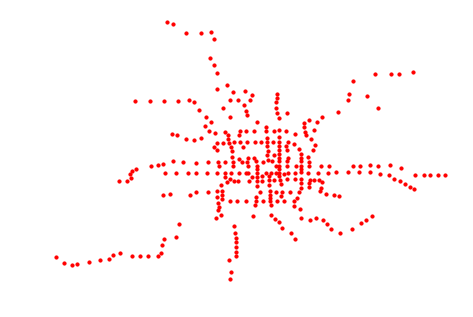

In [37]:
nx.draw(station_graph,station_location,node_size = 10)

## 3.将各号线上相邻的地铁站点连接起来

In [38]:
from collections import defaultdict

In [58]:
stations_connection = defaultdict(list)
stations_connection

defaultdict(list, {})

In [59]:
for line in subway_lines_stations.keys():
    for i,station in enumerate(subway_lines_stations[line][:-1]):
        if station == subway_lines_stations[line][i+1]: continue
        
        if subway_lines_stations[line][i+1] not in stations_connection[station]:
            stations_connection[station].append(subway_lines_stations[line][i+1])
        if station not in stations_connection[subway_lines_stations[line][i+1]]:
            stations_connection[subway_lines_stations[line][i+1]].append(station)       

In [61]:
stations_connection['南锣鼓巷']

['北海北', '东四', '什刹海']

In [62]:
stations_graph_connection = nx.Graph(stations_connection)

In [64]:
stations_graph_connection.edges()

EdgeView([('南邵', '沙河高教园'), ('沙河高教园', '沙河'), ('沙河', '巩华城'), ('巩华城', '朱辛庄'), ('朱辛庄', '生命科学园'), ('朱辛庄', '育知路'), ('生命科学园', '西二旗'), ('西二旗', '上地'), ('西二旗', '龙泽'), ('积水潭', '鼓楼大街'), ('鼓楼大街', '安定门'), ('鼓楼大街', '安华桥'), ('鼓楼大街', '什刹海'), ('安定门', '雍和宫'), ('雍和宫', '东直门'), ('雍和宫', '北新桥'), ('雍和宫', '和平里北街'), ('东直门', '东四十条'), ('东直门', '柳芳'), ('东直门', '三元桥'), ('东四十条', '朝阳门'), ('朝阳门', '建国门'), ('朝阳门', '东四'), ('朝阳门', '东大桥'), ('建国门', '北京站'), ('建国门', '东单'), ('建国门', '永安里'), ('北京站', '崇文门'), ('崇文门', '前门'), ('崇文门', '磁器口'), ('崇文门', '东单'), ('前门', '和平门'), ('和平门', '宣武门'), ('宣武门', '长椿街'), ('宣武门', '西单'), ('宣武门', '菜市口'), ('长椿街', '复兴门'), ('复兴门', '阜成门'), ('复兴门', '南礼士路'), ('复兴门', '西单'), ('阜成门', '车公庄'), ('车公庄', '西直门'), ('车公庄', '车公庄西'), ('车公庄', '平安里'), ('西直门', '大钟寺'), ('西直门', '动物园'), ('西直门', '新街口'), ('宋家庄', '刘家窑'), ('宋家庄', '肖村'), ('宋家庄', '成寿寺'), ('宋家庄', '石榴庄'), ('刘家窑', '蒲黄榆'), ('蒲黄榆', '天坛东门'), ('蒲黄榆', '景泰'), ('蒲黄榆', '方庄'), ('天坛东门', '磁器口'), ('磁器口', '桥湾'), ('磁器口', '广渠门内'), ('东单', '灯市口'), ('东单', '王府井'), ('灯市口', '东四'), ('东四', '张自忠路'

In [69]:
station_location['积水潭'] = (116.379185,39.954765)
station_location['车道沟'] = (116.30724,39.951215)

In [88]:
plt.figure(figsize = (100,100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

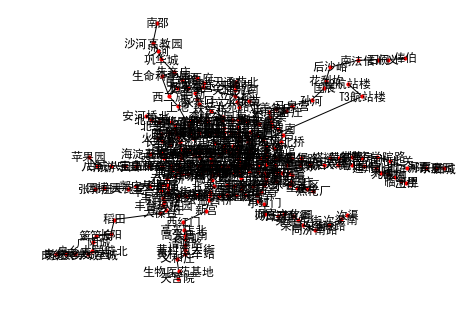

In [89]:
nx.draw(stations_graph_connection,station_location,with_labels = True,node_size = 10)

In [112]:
def stations_less_first(pathes):
    '''换乘最少'''
    return sorted(pathes,key=len)

In [113]:
def shortest_path_first(pathes):
    '''路径最短'''
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_station_distance(station,path[-1])
    
        return distance
    
    return sorted(pathes,key = get_path_distance)

In [110]:
def search(start,destination,connection_graph = stations_connection,\
            sort_candidate = stations_less_first):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successor = connection_graph[froninter]
        
        for station in successor:
            if station in visited: continue
            
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
            
        visited.add(froninter)
        pathes = sort_candidate(pathes)

In [111]:
print(search('车公庄西','双合'))

['车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '建国门', '永安里', '国贸', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合']


In [109]:
print(search('车公庄西','双合',sort_candidate = shortest_path_first))

['车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '大望路', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合']


In [120]:
def pretty_print(path):
    print(' --> '.join(path))

In [121]:
pretty_print(search('车公庄西','双合'))

车公庄西 --> 车公庄 --> 平安里 --> 北海北 --> 南锣鼓巷 --> 东四 --> 朝阳门 --> 建国门 --> 永安里 --> 国贸 --> 双井 --> 九龙山 --> 大郊亭 --> 百子湾 --> 化工 --> 南楼梓庄 --> 欢乐谷景区 --> 垡头 --> 双合


In [122]:
pretty_print(search('广渠门外','双合'))

广渠门外 --> 双井 --> 九龙山 --> 大郊亭 --> 百子湾 --> 化工 --> 南楼梓庄 --> 欢乐谷景区 --> 垡头 --> 双合
